# Movimento Longitudinal da Motocicleta - Normais, Curvas, Fracionamento da Energia e Fatores de Utilização
## Nota de Estudo

> **Autor:** Fábio Magnani (fabio.magnani@ufpe.br)  
> **Curso:** Engenharia Mecânica - UFPE  
> **Início do desenvolvimento:** 14/10/2025  
> **Primeira publicação:** 20/10/2025  
> **Versão Atual:** v-2025-10-20 (fase de testes das equações e correções das análises; teste técnico no Colab; uso pedagógico com estudantes e início da revisão final de código/texto)



---

O modelo básico usado neste notebook está em Magnani(2025), e a teoria em Magnani(2025a-c).

## Objetivo

Partindo de um modelo básico da moto, acrescentar o cálculo de:   
    - Forças normais,   
    - Forças em curvas,   
    - Fracionamento da potência,   
    - Consumo específico instantâneo,


## Referências

- Magnani, Fábio. “Física Básica das Motos”, 2020a.  
- Magnani, Fábio. “Solução Computacional do Movimento das Motos”, 2020b.  
- Magnani, Fábio. “O Motor da Moto”, 2020c.
- Magnani, Fábio. “Movimento Longitudinal da Motocicleta - Dinâmica Básica”, 2025.

## Principais simplificações

- Eficiência de transmissão 100%
- Rendimento do motor constante

## Estrutura

## Notação básica




## Simulação Dinâmica de Motocicleta

A Fig.1 mostra as forças atuando em uma motocicleta. A propulsão é uma força na direção do movimento, enquanto a frenagem, a resistência aerodinâmica, a resistência à rolagem e a ação da gravidade (no caso de subidas) resistem ao movimento. Para quem tiver mais interesse, o modelo deste *notebook* é introduzido em Magnani (2025) e a teoria completa em Magnani (2025b).

<figure style="margin: 0 0 1.25rem 0; text-align:center;">
  <img src="../figures/ne-moto-longitudinal-fig-01.png" alt="Balanço de forças na motocicleta" width="600" style="display:block; margin:0 auto; max-width:100%;">
  <figcaption><b>Figura 1.</b> Balanço de forças na motocicleta.</figcaption>
</figure>


### Modelo da motocicleta, pista e piloto


Façamos um breve resumo. Aplicando a 2ª Lei de Newton (balanço de forças) na direção do movimento ($x$), chegamos a:

$$
\begin{align}
m \frac{\mathrm{d}V}{\mathrm{d}t}
& =  F_\text{prop} - F_\text{fren,tras} - F_\text{fren,diant} - F_\text{aero} - F_\text{rol} - F_\text{grav,x}
\tag{1} \\
\frac{\mathrm{d}V}{\mathrm{d}t}
&= \alpha \,\frac{ P_{\max}}{m\,V}
- \beta_t\,\mu\, N_{rt}
- \beta_d\,\mu\, N_{rd}
- \frac{1}{2}\rho\, C_{D}\, A_{f}\,\frac{(V-W)^{2}}{m}
- C_{R}\, g \cos\theta
- g \sin\theta
\tag{2}
\end{align}
$$


Onde:

$$
\begin{aligned}
t &: \text{ tempo (s)} \\
x &: \text{ posição (m)} \\
V &: \text{ velocidade (m/s)} \\
a &: \text{ aceleração longitudinal } (a=\mathrm{d}V/\mathrm{d}t) \\
m &: \text{ massa moto+piloto (kg)} \\
P_{\max} &: \text{ potência máxima do motor (W)} \\
\mu &: \text{ coeficiente de atrito pneu–pista} \\
\theta &: \text{ inclinação da pista (rad)} \\
\rho &: \text{ densidade do ar (kg/m}^3\text{)} \\
A_f &: \text{ área frontal (m}^2\text{)} \\
C_R &: \text{ coeficiente de resistência à rolagem} \\
C_D &: \text{ coeficiente de arrasto aerodinâmico} \\
\alpha &: \text{ fração de uso do motor em }[0,1] \\
\beta_t,\ \beta_d &: \text{ frações de uso de atrito traseiro/dianteiro em }[0,1] \\
N_{rt},\ N_{rd} &: \text{ Normais nas rodas traseira e dianteira (N)} \\
W &: \text{ velocidade do vento longitudinal (m/s, sinal no mesmo sentido de $V$)} \\
R_{\text{curva}} &: \text{ raio da curva (m)} \\
k_A &: \text{ parâmetro aerodinâmico } \left(k_A=\tfrac{1}{2}\rho C_D A_f\right)
\end{aligned}
$$

As normais são obtidas fazendo o balanço de forças em $y$ e balanço de momentos em torno do ponto de contato entre o piso e o pneu traseiro, obtendo-se:

$$
\begin{align}
N_{rt} &= m\, g \cos\theta 
\left(1 - \frac{p_{CG}}{p_d}\right)
+ \frac{m\, a\, h_{CG} + k_A (V - W)^2 h_{CP} + m\, g \sin\theta \, h_{CG}}{p_d} \tag{3}
\\
N_{rd} &= m\, g \cos\theta \,\frac{p_{CG}}{p_d}
- \frac{m\, a\, h_{CG} + k_A (V - W)^2 h_{CP} + m\, g \sin\theta \, h_{CG}}{p_d}  \tag{4}
\end{align}
$$

Notamos, nos primeiros termos à direita nas equações acima, que a força do peso na direção $y$ (*i.e.*, $mg\cos\theta$) é divida entre as duas rodas em função da posição do centro de gravidade (*i.e.*, $p_{CG}/p_d$). Os segundos termos à direita, que têm o mesmo valor com sinal trocado, são a transferência de peso. Quer dizer a aceleração positiva, a resistência aerodinâmica e o aclive transferem o peso para a roda traseira; já a desaceleração e o declive transferem o peso para a roda dianteira.


### Caso Base: parâmetros da motocicleta, pista e piloto

Na tabela abaixo, temos os valores que usaremos no Caso Base do nosso estudo, bem como uma faixa aproximada dos valores que podemos encontrar na prática. 

| Símbolo | Valor base | Unidade | Faixa típica / Observação | Comentário sobre a escolha |
|---|---:|---|---|---|
| $α$  | 1.0 | – | 0–1 | Uso pleno do motor no caso-base |
| $β_t$  | 0 | – | 0–1 | Sem frenagem traseira no trecho de aceleração |
| $β_d$  | 0 | – | 0–1 | Sem frenagem dianteira no trecho de aceleração |
| $m$ | 250 | kg | 180–300 | Moto+piloto+carga |
| $μ$ | 0.8 | – | 0.6–1.0 | Aderência alta (asfalto seco) |
| $g$ | 9.81 | m/s² | 9.79–9.83 | Padrão SI |
| $θ$  | 0 | rad | −0.15 a 0.15 | Trecho plano |
| $ρ$ | 1.225 | kg/m³ | 1.1–1.3 | Nível do mar, 0–30 °C |
| $C_D$ | 0.7 | – | 0.6–0.9 | Piloto ereto; moto não carenada |
| $A_f$ | 0.7 | m² | 0.6–0.8 | Área frontal típica |
| $C_R$ | 0.02 | – | 0.01–0.03 | Pneus em asfalto | 
| $V_{0}$ | 0.01 | m/s | 0.01–0.5 | Evita singularidade em $P_{\max}/(mV)$ |
| $t_{0}$ | 0 | s | – | Início da simulação |
| $t_f$ | 30 | s | 10–60 | Janela para atingir regime |
| $h_{CG}$ | 0.72 | m | 0.6–0.8 | Altura do CG |
| $h_{CP}$ | 0.95 | m | 0.8–1.1 | Altura do centro de pressão |
| $p_d$ | 1.40 | m | 1.3–1.5 | Distância entre eixos |
| $p_{CG}$ | 0.67 | m | 0.6–0.8 | Distância do CG ao eixo traseiro (ligeiramente atrás do centro) |
| $W$ | 0 | m/s | −10 a 10 | Vento longitudinal (caso-base: calmo) |
| $R_{\text{curva}}$ | 1e10 | m | 30–300 | No caso base, estamos usando R=$ \infty $, *i.e.*, uma reta  |




### Modelo do motor

Usando um modelo simples que relaciona a potência com parâmetros básicos do motor, temos:

$$
P_{\text{max}}(\omega) =
\begin{cases}
\eta_m \, \eta_{vol,nom} \, \omega \, T_{ref}, & \omega < \omega_{red}\\[4pt]
0, & \omega \ge \omega_{red}  
\end{cases}
\tag{5}
$$

com

$$
\begin{aligned}
T_{ref} & = \dfrac{1}{4\pi} \mathbb{V}_{desl}\!\left(\dfrac{p_{a}}{R\,T_a}\right)
\dfrac{\sigma PC_{comb} M_{comb}}{\sigma+\lambda\,\gamma}, \qquad
\gamma = x+\dfrac{y}{4}-\dfrac{z}{2}, \qquad
M_{comb} = x\,M_C + y\,M_H + z\,M_O .
\end{aligned} \tag{6}
$$

A faixa de rotação do motor é menor do que a faixa necessária para a roda da motocicleta. Para isso, precisamos das marchas, que permitem mudar a relação entre a rotação do motor e da roda. A relação total de transmissão é: 

$$
r_{\text{total,i}} = r_{\text{primaria}} r_{\text{final}} r_{\text{marcha,i}}  \tag{7}
$$

Onde $r_{\text{primaria}}$ é a relação das engrenagens entre o virabrequim e o eixo de entrada na caixa de marchas, $r_{\text{final}}$ é a relação do número de dentes entre o pinhão e a coroa da motocicleta, e $r_{\text{marcha,i}}$ (variável) são as várias relações entre os pares de engrenagens dentro da caixa de marcha. $r_{\text{primaria}}$ é um dado de projeto, $r_{\text{final}}$ pode ser modificada trocando o pinhão ou a coroa, e $r_{\text{marcha,i}}$ é alterada pela piloto durante a operação da motocicleta (dentro das opções existentes na caixa de marchas). Temos, então,  a seguinte relação entre a velocidade e a rotação do motor:

$$
\omega = r_{\text{total,i}} \frac{V}{R_{\text{rod}}} =  r_{\text{primaria}} r_{\text{final}} r_{\text{marcha,i}} \frac{V}{R_{\text{rod}}}  \tag{8}
$$


Unindo todas as equações, obtemos:


$$
P_{\text{max}}(\omega) =
\begin{cases}
 \eta_m \eta_{vol,nom} \dfrac{\omega}{4\pi} \mathbb{V}_{desl} \underbrace{  \!\left(\dfrac{p_{a}}{R\,T_a}\right)}_{\text{atmosfera}}
&\underbrace{\dfrac{\sigma\,PC_{comb} (x\,M_C + y\,M_H + z\,M_O)}{\sigma+\lambda\ (x+y/4-z/2)}}_{\text{combustível}}&, \omega \le \omega_{red}\\[4pt]
&0 &,  \omega > \omega_{red}
\end{cases}
\tag{9}
$$

Ou

$$
P_{\text{roda}}(\omega,\alpha) = \alpha P_{\text{max}}(\omega) =
\begin{cases}
 \alpha \eta_m \eta_{vol,nom} \dfrac{\omega}{4\pi} \mathbb{V}_{desl} \underbrace{  \!\left(\dfrac{p_{a}}{R\,T_a}\right)}_{\text{atmosfera}}
&\underbrace{\dfrac{\sigma\,PC_{comb} (x\,M_C + y\,M_H + z\,M_O)}{\sigma+\lambda\ (x+y/4-z/2)}}_{\text{combustível}}&, \omega \le \omega_{red}\\[4pt]
&0 &,  \omega > \omega_{red}
\end{cases}
\tag{10}
$$


Pela equação acima, vemos que a potência máxima disponível na roda depende da eficiência volumétrica (*i.e.*, geometria da admissão e do escape, configuração do sistema de abertura e fechamento das válvulas), do rendimento térmico do motor (*i.e.*, sua capacidade de transformar energia química em energia mecânica), do tamanho do motor (*i.e.*, a cilindrada do motor), das condições do ar ambiente e das características do combustível (tanto da sua energia específica quanto da sua estequiometria, pois um combustível pode ter menos energia por kg mas permitir uma maior quantidade de combustível para a mesma quantidade de ar, como é o caso do álcool em relação à gasolina);


$$
F_{\text{prop}}(\alpha,i) = \frac{P_{\text{roda}}}{V} = 
\begin{cases}
 \alpha \eta_m \eta_{vol,nom}\mathbb{V}_{desl} \underbrace{\dfrac{r_{\text{total,i}}}{4\pi R_{\text{rod}}}}_{\text{transmissão}}  \underbrace{  \!\left(\dfrac{p_{a}}{R\,T_a}\right)}_{\text{atmosfera}}
&\underbrace{\dfrac{\sigma\,PC_{comb} (x\,M_C + y\,M_H + z\,M_O)}{\sigma+\lambda\ (x+y/4-z/2)}}_{\text{combustível}}&, V \le \omega_{\text{red}}R_{\text{rod}}/r_{\text{total,i}} \\[4pt]
&0 &,  V > \omega_{\text{red}}R_{\text{rod}}/r_{\text{total,i}}
\end{cases}
\tag{11}
$$

Podemos notar que o modelo representa bem o comportamento qualitativo do motor, no qual a força de propulsão depende da escolha do piloto, abrindo a borboleta (*i.e.*, aumentando $\alpha$) ou baixando a marcha (*i.e.*, aumentando $r_{\text{total,i}}$ - desde que a rotação não atinja o limite superior de corte do motor).


### Caso Base: parâmetros do motor

#### **1. Parâmetros atmosféricos**

| Símbolo | Nome / Significado | Valor | Unidade (SI) | Unidade usual | Observação |
|:---:|:---|---:|---|---|---|
| $p_a$ | Pressão absoluta do ar | 101 325 | Pa | 1 atm | Condição padrão ao nível do mar |
| $T_a$ | Temperatura do ar | 293.15 | K | 20 °C | Condição ambiente média |
| $R$ | Constante universal dos gases | 8.314 × 10⁰ | J/(mol·K) | – | Valor universal |


#### **2. Parâmetros do motor**

| Símbolo | Nome / Significado | Valor | Unidade (SI) | Unidade usual | Observação |
|:---:|:---|---:|---|---|---|
| $\mathbb{V}_{desl}$ | Volume deslocado total (cilindrada) | 3.00 × 10⁻⁴ | m³ | 300 cm³ | Moto de média cilindrada |
| $\eta_{vol,nom}$ | Eficiência volumétrica | 0.90 | – | 90 % | Moto aspirada em regime médio |
| $\eta_m$ | Rendimento térmico (comb->roda) | 0.30 | – | 30 % | Inclui perdas mecânicas e térmicas |
| $\omega_{red}$ | Rotação limite (*redline*) | 995 rad/s | rad/s | 9 500 rpm | A partir daqui a potência é anulada no modelo |
| $P_{\text{max}}$ | Potência máxima na roda | *calculada* | W | kW ou hp | Via Eq. (9) |

Atenção, existe uma relação muito forte entre a eficiência volumétrica no modelo do motor ($\eta_{\text{vol}}$) e a posição do acelerador no modelo da motocicleta ($\alpha$), já que a eficiência volumétrica depende tanto do projeto do motor quanto da posição da borboleta. Não iremos discutir essa questão neste *notebook*. Na prática, iremos considerar essas contribuições em duas partes, $\eta_{vol,nom}$ representando o papel do projeto da admissão, escape e válvulas; e $\alpha$ representando a posição da borboleta.

#### **3. Parâmetros do combustível (gasolina ≈ C₈H₁₈)**

| Símbolo | Nome / Significado | Valor | Unidade (SI) | Unidade usual | Observação |
|:---:|:---|---:|---|---|---|
| $x, y, z$ | Coeficientes estequiométricos (CₓH_yO_z) | 8, 18, 0 | – | – | Combustível genérico tipo gasolina |
| $M_C$ | Massa molar do carbono | 12.011 × 10⁻³ | kg/mol | 12.011 g/mol | – |
| $M_H$ | Massa molar do hidrogênio | 1.008 × 10⁻³ | kg/mol | 1.008 g/mol | – |
| $M_O$ | Massa molar do oxigênio | 15.999 × 10⁻³ | kg/mol | 15.999 g/mol | – |
| $M_{comb}$ | Massa molar da molécula de combustível | 0.11423 | kg/mol | 114.23 g/mol | Para C₈H₁₈ |
| $PC_{comb}$ | Poder calorífico inferior | 44.8 × 10⁶ | J/kg | 44.8 MJ/kg | Gasolina comercial |
| $\rho_{comb}$ | Densidade do combustível | 0.74 | kg/litro | 0.74 kg/litro | Gasolina comercial |
| $\gamma$ | Termo auxiliar ($x + y/4 - z/2$) | 12.5 | – | – | Determina a proporção teórica de O₂ em relação ao combustível|
| $\sigma$ | Fração molar de O₂ no ar | 0.21 | – | 21 % | Atmosfera padrão |
| $\lambda$ | Fator de excesso de ar (razão ar/comb. real ÷ teórica) | 1.0 | – | – | Mistura estequiométrica |



####  **4. Parâmetros da transmissão**

| Símbolo | Nome / Significado | Valor | Unidade (SI) | Unidade usual | Observação |
|:---:|:---|---:|:---|:---|:---|
| $R_{\text{rod}}$ | Raio efetivo da roda traseira | 0.30 | m | 300 mm | Raio dinâmico roda+pneu |
| $r_{\text{prim}}$ | Relação primária | 2.40 | – | – | Virabrequim → eixo de entrada |
| $r_{\text{marcha}}$ | Relações (1ª→5ª) | [2.50, 1.80, 1.40, 1.20, 1.00] | – | – | **Faixas típicas**: 1ª 2.2–2.8 (saída do zero); 2ª 1.6–2.1; 3ª 1.3–1.6; 4ª 1.1–1.3; 5ª 0.9–1.1 (muitas motos têm “overdrive” < 1). |
| $r_{\text{final}}$ | Relação final | 2.60 | – | – | Ex.: 3.20 “curta” (acelera melhor) vs 2.60 “longa” (Vmáx maior). |
| $r_{\text{tot}}$ | $r_{\text{prim}}\cdot r_{\text{marcha}}\cdot r_{\text{final}}$ | – | – | – | Multiplica torque/rotação entre motor e roda. |




### Curva: forças laterais, resultantes de atrito e fatores de uso

O atrito da roda é usado para acelerar ($F_{\text{prop}}$), frear ($F_{\text{fren}}$) e para fazer curvas. Então, para saber se estamos dentro do limite, precisamos calcular a força centrípeta.


<figure style="margin: 0 0 1.25rem 0; text-align:center;">
  <img src="../figures/ne-moto-longitudinal-fig-02.png" alt="Balanço de forças na motocicleta" width="1200" style="display:block; margin:0 auto; max-width:100%;">
  <figcaption><b>Figura 2.</b> Balanço de forças na motocicleta durante as curvas.</figcaption>
</figure>


Sabemos que a força centrípeta para fazer a curva é dada pela equação:


$$
F_{\text{cen}}=\frac{m\,V^2}{R_{\text{curva}}} \tag{12}
$$

Vamos distribuir essa força entre as rodas traseira e dianteira usando a distância do centro de gravidade a cada uma delas:


$$
\begin{align}
F_{\text{cen,d}}=\frac{m\,V^2}{R_{\text{curva}}}&\left(\frac{p_{CG}}{p_d}\right)
\tag{13}  \\
F_{\text{cen,t}}=\frac{m\,V^2}{R_{\text{curva}}}&\left(1-\frac{p_{CG}}{p_d}\right)
\tag{14}
\end{align}
$$

A força de atrito usada em cada roda é a resultante entre as forças longitudinais (propulsão ou frenagem) e transversais (centrípeta):


$$
\begin{align}
\bigl|F_{\text{at,d}}\bigr| &= \sqrt{F_{\text{frn,d}}^{\,2}+F_{\text{cen,d}}^{\,2}} \tag{15} \\
\bigl|F_{\text{at,t}}\bigr| &= \sqrt{(F_{\text{pro}}+F_{\text{frn,t}})^{2}+F_{\text{cen,t}}^{\,2}} \tag{16}
\end{align}
$$

Finalmente, temos que a força de atrito disponível em cada roda é dada pelo coeficiente de atrito vezes a normal (vamos considerar que a roda nunca trava, o que nos obrigaria a usar o coeficiente de atrito dinâmico ao invés do estático):

$$
\begin{align}
\bigl|F_{\text{disp,d}}\bigr|=\mu\,N_{rd} \tag{17} \\
\bigl|F_{\text{disp,t}}\bigr|=\mu\,N_{rt} \tag{18}
\end{align}
$$

### Margens de uso

Para facilitar a nossa visualização dos resultados (*i.e.*, se a moto passou dos limites do modelo), vamos definir a margem de uso ($\epsilon$). Colocando de forma simples, se $\epsilon<0$ então o resultado do modelo não é mais físico. Em outro *notebook*, usaremos o $\epsilon$ como variável de controle, quer dizer, o piloto irá mudar o seu comportamento ($\alpha$ ou $\beta$) para prevenir que a moto saia de seus limites (*i.e.*, empine uma das rodas, patine ou trave as rodas, ou saia nas curvas).


- **Margem de aderência** (quanto falta para saturar o atrito em cada roda):
$$
\epsilon_{\text{ad,d}} = 1-\frac{\bigl|F_{\text{at,d}}\bigr|}{\bigl|F_{\text{disp,d}}\bigr|} \tag{19}
$$

$$
\epsilon_{\text{ad,t}} = 1-\frac{\bigl|F_{\text{at,t}}\bigr|}{\bigl|F_{\text{disp,t}}\bigr|} \tag{20}
$$

- **Margem da normal** (quanto falta para a roda perder o contato com o chão)>

$$
\epsilon_{\text{no,d}}=\frac{N_{rd}}{N_{\text{est,d}}} \tag{21}
$$

$$
\epsilon_{\text{no,t}}=\frac{N_{rt}}{N_{\text{est,t}}} \tag{22}
$$


Onde definimos as normais estáticas puras (*i.e.*, as estáticas caso a moto estivesse parada, sem transferência de peso) como:


$$
N_{\text{est,d}}=m\,g\cos\theta\,\dfrac{p_{CG}}{p_d} \tag{23}
$$

$$
N_{\text{est,t}}=m\,g\cos\theta\,\left(1-\dfrac{p_{CG}}{p_d}\right) \tag{24}
$$




### Potências instantâneas

Finalmente, vamos calcular as potências instantâneas e o consumo da motocicleta. Lembrando das forças:

$$
\begin{align}
&F_{\text{pro}}=\frac{P_{\text{roda}}(\omega)}{V} \tag{25} \\
&F_{\text{fren}}=F_{\text{fren,d}}+F_{\text{fren,t}} \tag{26} \\
&F_{\text{aer}}=\tfrac12\,\rho\,C_D\,A_f\,(V-W)^2 \tag{27} \\
&F_{\text{rol}}=C_R\,m\,g\cos\theta \tag{28} \\
&F_{\text{grav}}=m\,g\sin\theta \tag{29} 
\end{align}
$$

Como $P = F \cdot V$, obtemos:


$$
\begin{align}
&P_{\text{iner}}=m V \frac{\mathrm d V}{\mathrm d t} \tag{30} \\
&P_{\text{pro}}= P_{\text{roda}} \tag{31} \\
&P_{\text{fren}}=V(F_{\text{fren,d}}+F_{\text{fren,t}}) \tag{32} \\
&P_{\text{aer}}=\tfrac12\,\rho\,C_D\,A_f\,V(V-W)^2 \tag{33} \\
&P_{\text{rol}}=C_R m g  V \cos\theta \tag{34} \\
&P_{\text{grav}}=m V g \sin\theta \tag{35} 
\end{align}
$$

Fazendo o balanço, para o caso sem frenagem:

$$
P_{\text{roda}} =  P_{\text{iner}} + P_{\text{aer}} + P_{\text{rol}} + P_{\text{grav}} \tag{36}
$$

Quer dizer, é necessária maior potência na roda para acelerar a moto, vencer o arrasto, vencer a resistência à rolagem e subir um aclive.

Já para o caso de frenagem sem o uso do motor, temos:


$$
P_{\text{fren}} =  -P_{\text{iner}} - P_{\text{aer}} - P_{\text{rol}} - P_{\text{grav}} \tag{37}
$$

Lembrando que na desaceleração, $dV/dt<0$ (*i.e.*, $-P_{\text{iner}}$>0), precisamos de uma maior potência de frenagem quando queremos desacelerar mais. Já o arrasto aerodinâmico, a resistência à rolagem e o aclive diminuem a potência de frenagem, pois essas potências em si só já tem a tendência de desacelerar a moto. Devemos lembrar que no caso de declives, a gravidade resulta em uma maior necessidade de frenagem.

### Autonomia específica

A autonomia específica da motocicleta é dada por quantos quilometros ela se desloca por cada litro de combustível consumido. A potência do combustível é calculada a partir da potência na roda e o rendimento total do motor/motocicleta:

$$
  P_{\text{comb}}=\frac{P_{\text{roda}}}{\eta_{\text{m}}} \tag{38}
$$

O consumo mássico de combustível é dado por:

$$
 \dot m_{\text{comb}}=\frac{P_{\text{comb}}}{PC_{\text{comb}}}
=\frac{P_{\text{roda}}}{\eta_{\text{m}}\,PC_{\text{comb}}}  \tag{39}
$$


O consumo em litros por segundo é:

$$
  \dot V_{\text{comb}}=\frac{\dot m_{\text{comb}}}{\rho_{\text{comb}}}
=\frac{P_{\text{motor}}}{\eta_{\text{m}}\,PC_{\text{comb}}\,\rho_{\text{comb}}} \tag{40}
$$

Finalmente, o consumo instantâneo da motocicleta

$$\mathcal{C}_{\text{inst}}[\text{km/litro}]
=\frac{V}{1000\,\dot V_{\text{comb}}}
=\frac{\eta_{\text{m}}\,PC_{\text{comb}}\,\rho_{\text{comb}}}{1000}
\frac{V}{P_{\text{roda}}} \tag{41}
$$

Ou, no caso sem frenagem:

$$\mathcal{A}_{\text{inst}}
=\frac{\eta_{\text{m}}\,PC_{\text{comb}}\,\rho_{\text{comb}}}{1000 m \left( \frac{\mathrm d V}{\mathrm d t} + \frac{1}{2m} \rho\,C_D\,A_f\,(V-W)^2 + C_R g \cos\theta + g \sin\theta\right)}
\frac{}{} \tag{42}
$$

Podemos ver claramente o papel dos vaários parâmetros no consumo: rendimento do motor (carros veículos elétricos consomem menos energia), poder calorífico (veículos a gasolina consomem menos combustível que veículos a álcool), massa (motos consomem menos que carros), inclinação da pista (na subida o consumo é maior que nas descidas) e eficiência do veículo (carros com melhor aerodinâmica e menor resistência à rolagem consomem menos).


Substituindo a Eq.2 e a Eq.11 na Eq. 42, obtemos:

$$\mathcal{A}_{\text{inst}}
=\frac{\eta_{\text{m}}\,PC_{\text{comb}}\,\rho_{\text{comb}}}{1000 m \alpha \eta_m \eta_{vol,nom}\mathbb{V}_{desl} \dfrac{r_{\text{total,i}}}{4\pi R_{\text{rod}}}   \!\left(\dfrac{p_{a}}{R\,T_a}\right)
\dfrac{\sigma\,PC_{comb} (x\,M_C + y\,M_H + z\,M_O)}{\sigma+\lambda\ (x+y/4-z/2)}}
\frac{}{} \tag{43}
$$

Para nosso modelo, a autonomia específica não vai ser função da velocidade, o que não é realista. Isso está acontecendo porque escolhemos um modelo de motor simplificado, no qual a eficiência volumétrica e o rendimento do motor não variam com
a rotação.

## Seleção de marchas

Precisamos agora de uma estratégia para a troca de marchas. No mundo real, o piloto pode escolher uma entre várias marchas, para privilegiar maior potência ou menor consumo, vibração ou ruído. No Caso Base, o piloto irá escolher a marcha que entregue a maior potência máxima (para o nosso modelo simples, isso significa maior rotação).

Em primeiro lugar, determinamos quais marchas ele pode escolher (*i.e.*, quais marchas não provocam uma rotação maior que $\omega_{\text{red}}$). Uma marcha é **válida** em $V$ se não estoura o *redline*:

$$
\mathcal{S}(V) \;=\; \left\{\, i \;\big|\; \omega_i(V) \;<\; \omega_{\text{red}} \,\right\}.
$$

Casos:
- Se $\mathcal{S}(V)=\varnothing$ (vazio), então nenhuma marcha atende ao redline nessa $V$ (atingiu a $V_{\max}$ do conjunto de marchas) e a propulsão é tomada como nula.
- Se $\mathcal{S}(V)\neq\varnothing$, há ao menos uma marcha disponível.


Entre as marchas válidas em $V$, escolheremos aquela que fornece a maior rotação



### Implementação computacional

#### Visão geral
Integra uma única simulação de V(t) com seleção automática de marcha pelo redline, e pós-processa forças, potências, margens de aderência/normal e consumo instantâneo (km/L).

#### Parâmetros e ambiente
Define massa, gravidade, inclinação, vento, atrito, geometria (h_CG, h_CP, p_CG, p_d), aerodinâmica (C_D, A_f) e tempo de simulação. Usa k_A = ½ ρ C_D A_f.

#### Transmissão e rotação
Calcula as relações totais por marcha (primária × final × marcha). O raio da roda liga a velocidade à rotação do motor por marcha. Há um limite de rotação (redline).

#### Potência do motor
Modelo proporcional à rotação até o redline; acima disso a potência é cortada:
$$
P_{\text{motor}}(\omega)=\eta_m\,\eta_{\text{vol}}\,T_{\text{ref}}\;\omega,\quad
P_{\text{motor}}=0\ \text{se}\ \omega\ge\omega_{\max}.
$$

#### Seleção automática de marcha
Para cada velocidade V, calcula as rotações por marcha e escolhe a maior rotação válida (abaixo do redline). A potência usada no instante é avaliada nessa marcha.

#### Dinâmica longitudinal (EDO)
Força propulsiva efetiva:
$$
F_{\text{prop}}=\alpha\,\frac{P_{\text{av}}}{\max(V,\varepsilon)}.
$$
Resistências:
$$
F_{\text{aer}}=\tfrac12\rho C_D A_f(V-W)^2,\quad
F_{\text{rol}}=C_R\,m g\cos\theta,\quad
F_{\text{grav}}=m g\sin\theta.
$$
Frenagem parametrizada (opcional):
$$
F_{\text{fren}}=\mu\big(\beta_t N_t+\beta_d N_d\big).
$$
Equação de estado integrada com `solve_ivp`:
$$
\dot V=\frac{F_{\text{prop}}-F_{\text{aer}}-F_{\text{rol}}-F_{\text{grav}}-F_{\text{fren}}}{m}.
$$

#### Normais nas rodas e margens
No pós-processamento, refina as normais com termo inercial m a h_CG:
$$
N_t=m g\cos\theta\!\left(1-\frac{p_{CG}}{p_d}\right)
+\frac{m a h_{CG}+k_A(V-W)^2 h_{CP}+m g\sin\theta\,h_{CG}}{p_d},
$$
$$
N_d=m g\cos\theta\!\left(\frac{p_{CG}}{p_d}\right)
-\frac{m a h_{CG}+k_A(V-W)^2 h_{CP}+m g\sin\theta\,h_{CG}}{p_d}.
$$
Margens:
$$
\varepsilon_{\text{ad}}=1-\frac{|F_{\text{fat}}|}{\max(|\mu N|,10^{-9})},\qquad
\varepsilon_{\text{no}}=\frac{N}{\max(N_{\text{est}},10^{-9})}.
$$

#### Potências e autonomia específica
Potências (curvas separadas; mostra apenas partes positivas de inércia/gravidade):
$$
P_{\text{aer}}=F_{\text{aer}}V,\quad
P_{\text{rol}}=F_{\text{rol}}V,\quad
P_{\text{grav}}=F_{\text{grav}}V,\quad
P_{\text{iner}}=m V a,\quad
P_{\text{fren}}=F_{\text{fren}}V.
$$
Autonomia especifica (km/L):
$$
C_{\text{inst}}=\left(\eta_m\,PC_{\text{comb}}\,\rho_{\text{comb}}/1000\right)\,
\frac{V}{\max(P_{\text{motor}},1)}.
$$

#### Saídas
Gráficos de V(t), N_t e N_d, margens de aderência e de normal, potências separadas e consumo instantâneo, todos coerentes com a seleção de marcha imposta pelo redline.



In [27]:
# ============================================================
# CÉLULA BASE — parâmetros, modelos e função de simulação
# ============================================================

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# ------------------------------
# 1) Parâmetros do veículo/ambiente
# ------------------------------
m      = 250.0      # kg
g      = 9.81       # m/s²
theta  = 0.0        # rad
rho    = 1.225      # kg/m³
C_D    = 0.70       # -
A_f    = 0.80       # m²
C_R    = 0.020      # -
alpha  = 1.0        # -
mu     = 0.80       # -
beta_t = 0.0        # -
beta_d = 0.0        # -
R_rod  = 0.30       # m
W      = 0.0        # m/s
V_eps  = 1e-2       # m/s

# Geometria
h_CG, h_CP = 0.72, 0.95   # m
p_d, p_CG  = 1.40, 0.67   # m

# Curvatura
R_curva = 1e10  # m

# Tempo (agora com n_eval configurável)
t0, tf  = 0.0, 30.0
n_eval  = 800  # pontos de avaliação

# ------------------------------
# 2) Transmissão
# ------------------------------
r_primary = 2.40
r_gears   = np.array([2.50, 1.80, 1.40, 1.20, 1.00])
r_final   = 2.60

# ------------------------------
# 3) Motor simples P(ω)
# ------------------------------
V_desl = 300e-6
p_a    = 101325.0
T_a    = 293.15
eta_vol = 0.90
eta_m   = 0.30
sigma   = 0.21
lam     = 1.0
R       = 8.314462618

# Combustível ~ C8H18
x, y, z = 8, 18, 0
PC_comb = 44.8e6
M_C, M_H, M_O = 12.011e-3, 1.008e-3, 15.999e-3
M_comb = x*M_C + y*M_H + z*M_O
rho_comb = 0.74  # kg/L

rpm_redline = 9500.0

# ------------------------------
# Função para atualizar grandezas derivadas SEMPRE que parâmetros mudarem
# ------------------------------
def update_derived():
    global k_A, w_redline, r_totals, t_eval
    k_A       = 0.5 * rho * C_D * A_f
    w_redline = rpm_redline * 2*np.pi/60.0
    r_totals  = r_primary * r_final * r_gears
    t_eval    = np.linspace(t0, tf, int(n_eval))

update_derived()

def pmotor(omega):
    gamma = x + y/4 - z/2
    T_ref = (1/(4*np.pi)) * V_desl * (p_a/(R*T_a)) * (sigma*PC_comb*M_comb) / (sigma + lam*gamma)
    w = np.asarray(omega, float)
    w_eff = np.where(w < w_redline, w, 0.0)
    return eta_m * eta_vol * w_eff * T_ref

def power_from_speed(V):
    omegas = r_totals * (V / R_rod)
    valid = np.where(omegas < w_redline)[0]
    if valid.size == 0:
        return 0.0
    k = valid[np.argmax(omegas[valid])]
    return pmotor(omegas[k])

power_from_speed_vec = np.vectorize(power_from_speed)

def dVdt(t, y):
    V = max(y[0], 0.0)
    Veff = V if V > V_eps else V_eps
    P_av  = power_from_speed(V)
    F_prop = alpha * P_av / Veff
    N_rt = m*g*np.cos(theta)*(1 - p_CG/p_d) + (k_A*(V - W)**2*h_CP + m*g*np.sin(theta)*h_CG)/p_d
    N_rd = m*g*np.cos(theta)*(p_CG/p_d)     - (k_A*(V - W)**2*h_CP + m*g*np.sin(theta)*h_CG)/p_d
    F_fren = beta_t*mu*N_rt + beta_d*mu*N_rd
    F_aer  = 0.5 * rho * C_D * A_f * (V-W)**2
    F_rol  = C_R * m * g * np.cos(theta)
    F_grav = m * g * np.sin(theta)
    return [(F_prop - F_aer - F_rol - F_grav - F_fren) / m]

# ------------------------------
# Parâmetros que o runner pode sobrescrever
# ------------------------------
PARAM_NAMES = [
    "m","theta","rho","C_D","A_f","C_R","alpha","mu","beta_t","beta_d",
    "R_rod","W","rpm_redline","R_curva","t0","tf","n_eval","V0"
]

# ------------------------------
# Função única que roda a simulação e plota
# ------------------------------
def simulate_and_plot(V0=None):
    if V0 is None: V0 = 0.1
    # garante que t_eval e derivados refletem os parâmetros atuais
    update_derived()

    sol = solve_ivp(dVdt, (t0, tf), [V0], t_eval=t_eval, max_step=0.05)
    V = sol.y[0]; t = sol.t
    print(f"V_final = {V[-1]:.2f} m/s  ({3.6*V[-1]:.1f} km/h)")

    omegas_all = np.outer(r_totals, V / R_rod)
    valid_mask = omegas_all < w_redline
    idx = np.argmax(np.where(valid_mask, omegas_all, -np.inf), axis=0)
    omega_sel = omegas_all[idx, np.arange(omegas_all.shape[1])]
    P_motor = alpha * pmotor(omega_sel)

    F_prop = P_motor / np.maximum(V, V_eps)
    F_aer  = 0.5 * rho * C_D * A_f * (V-W)**2
    F_rol  = C_R * m * g * np.cos(theta)
    F_grav = m * g * np.sin(theta)

    a = np.gradient(V, t, edge_order=2)
    N_rt = m*g*np.cos(theta)*(1 - p_CG/p_d) + (m*a*h_CG + k_A*(V - W)**2*h_CP + m*g*np.sin(theta)*h_CG)/p_d
    N_rd = m*g*np.cos(theta)*(p_CG/p_d)     - (m*a*h_CG + k_A*(V - W)**2*h_CP + m*g*np.sin(theta)*h_CG)/p_d
    F_fren = beta_t*mu*N_rt + beta_d*mu*N_rd

    F_cen_d = m*V**2/R_curva*(p_CG/p_d)
    F_cen_t = m*V**2/R_curva*(1 - p_CG/p_d)
    F_fat_d = np.sqrt((0.0)**2 + F_cen_d**2)
    F_fat_t = np.sqrt((F_prop - F_fren)**2 + F_cen_t**2)
    F_disp_d = mu * N_rd
    F_disp_t = mu * N_rt
    eps_ad_d = 1 - np.abs(F_fat_d)/np.maximum(np.abs(F_disp_d), 1e-9)
    eps_ad_t = 1 - np.abs(F_fat_t)/np.maximum(np.abs(F_disp_t), 1e-9)
    N_est_d = m*g*np.cos(theta)*(p_CG/p_d)
    N_est_t = m*g*np.cos(theta)*(1 - p_CG/p_d)
    eps_no_d = N_rd/np.maximum(N_est_d, 1e-9)
    eps_no_t = N_rt/np.maximum(N_est_t, 1e-9)

    P_iner = m * V * a
    P_aer  = F_aer * V
    P_rol  = F_rol * V
    P_grav = F_grav * V
    P_fren = F_fren * V
    P_iner_pos = np.maximum(P_iner, 0.0)
    P_grav_pos = np.maximum(P_grav, 0.0)

    C_inst = (eta_m * PC_comb * rho_comb / 1000.0) * V / np.maximum(P_motor, 1.0)

    tag = f"(mu={mu}, alpha={alpha}, W={W} m/s, tf={tf}s)"

    plt.figure(figsize=(8,3.6))
    plt.plot(t, V*3.6)
    plt.xlabel('t [s]'); plt.ylabel('V [km/h]'); plt.title('Velocidade ' + tag)
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(8,3.6))
    plt.plot(t, N_rt, label='N_traseira')
    plt.plot(t, N_rd, label='N_dianteira')
    plt.xlabel('t [s]'); plt.ylabel('N [N]'); plt.title('Normais nas rodas ' + tag); plt.legend()
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(8,3.6))
    plt.plot(t, eps_ad_t, label='ε_ad,t')
    plt.plot(t, eps_ad_d, label='ε_ad,d')
    plt.xlabel('t [s]'); plt.ylabel('ε'); plt.title('Margens de aderência ' + tag); plt.legend()
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(8,3.6))
    plt.plot(t, eps_no_t, label='ε_no,t')
    plt.plot(t, eps_no_d, label='ε_no,d')
    plt.xlabel('t [s]'); plt.ylabel('ε'); plt.title('Margens de normal ' + tag); plt.legend()
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(9,4.6))
    plt.plot(t, P_motor, '--', lw=1.6, label='P_motor (linha)')
    plt.plot(t, P_aer,          lw=1.6, label='P_arrasto')
    plt.plot(t, P_rol,          lw=1.6, label='P_rolagem')
    plt.plot(t, P_grav_pos,     lw=1.6, label='P_gravidade (+)')
    plt.plot(t, P_iner_pos,     lw=1.6, label='P_inércia (+)')
    if np.any(P_fren > 0):
        plt.plot(t, np.maximum(P_fren,0.0), lw=1.6, label='P_frenagem (+)')
    plt.xlabel('t [s]'); plt.ylabel('Potência [W]')
    plt.title('Potências instantâneas — curvas separadas ' + tag)
    plt.legend(loc='best', ncols=2); plt.tight_layout(); plt.show()

    plt.figure(figsize=(8,3.6))
    plt.plot(t, C_inst)
    plt.xlabel('t [s]'); plt.ylabel('km/litro'); plt.title('Autonomia específica ' + tag)
    plt.tight_layout(); plt.show()

# ------------------------------
# Runner: altera parâmetros (globais), roda e RESTAURA
# ------------------------------
def run_case(**overrides):
    backup = {k: globals()[k] for k in PARAM_NAMES if k in globals()}
    try:
        for k,v in overrides.items():
            if k in PARAM_NAMES:
                globals()[k] = v
        update_derived()  # refaz k_A, w_redline, r_totals, t_eval
        V0_local = overrides.get("V0", None)
        simulate_and_plot(V0=V0_local)
    finally:
        for k,v in backup.items():
            globals()[k] = v
        update_derived()


V_final = 37.91 m/s  (136.5 km/h)


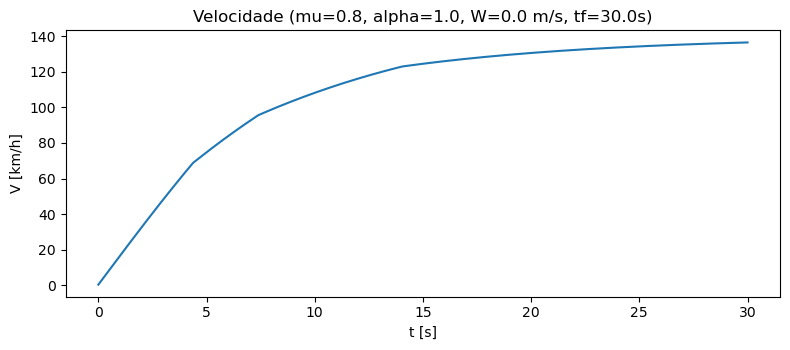

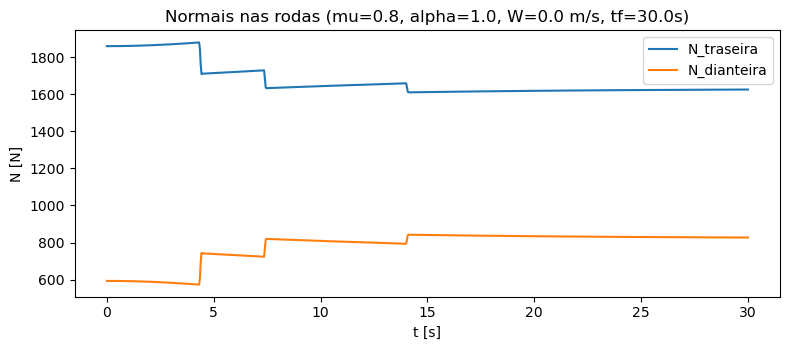

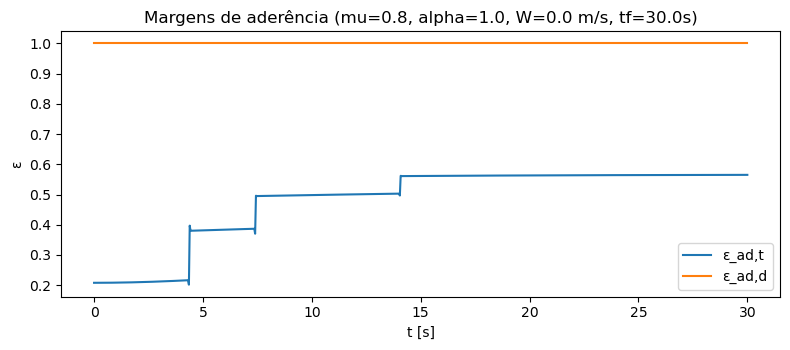

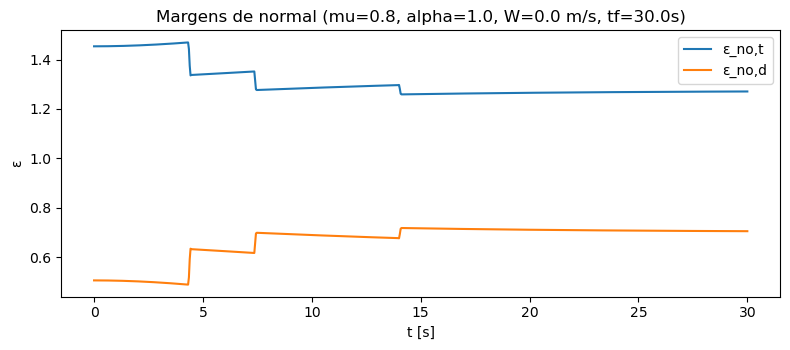

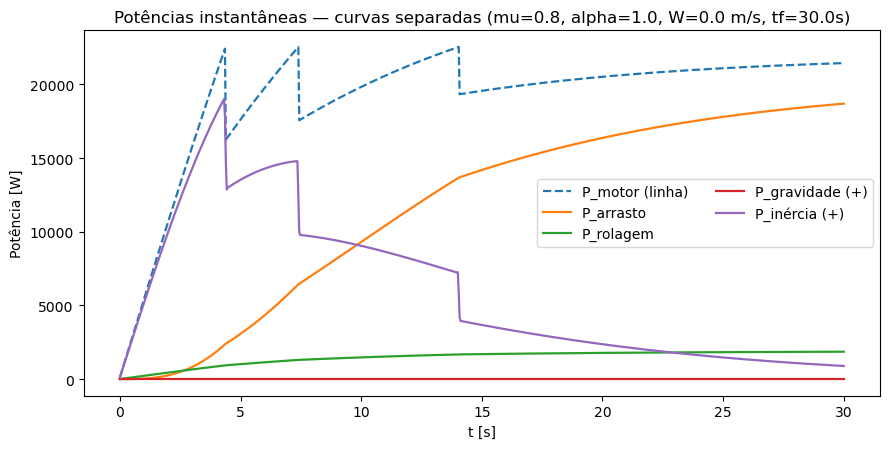

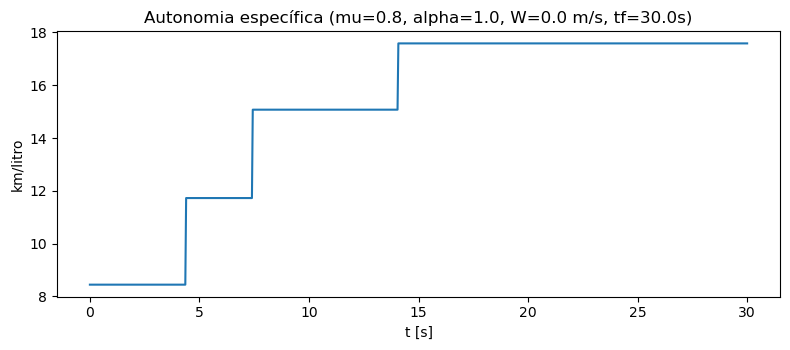

In [32]:
# ============================================================
# CÉLULA EXEMPLO — rode casos sem duplicar código
# ============================================================

# Caso base (como definido na célula acima)
run_case()

# Exemplo 1: vento de frente e menor atrito
# run_case(W=-5.0, mu=0.65)

# Exemplo 2: “meia carga” no acelerador
# run_case(alpha=0.6)

# Exemplo 3: rampa leve e mudança de densidade do ar
# run_case(theta=np.deg2rad(2.0), rho=1.15)

# Exemplo 4: varredura rápida de μ
# for mu_val in [0.9, 0.8, 0.7, 0.6]:
#     print(f"\n--- mu={mu_val} ---")
#     run_case(mu=mu_val)


### Discussão física dos resultados

#### Velocidade $V(t)$
Com $\alpha = 1$ (acelerador pleno) e $\beta_t = \beta_d = 0$ (sem freio), no início do movimento quase toda a potência do motor vai para acelerar a moto. Depois, com o aumento da velocidade, a potência passa a ser usada cada vez mais para vencer o arrasto aerodinãmico. Até chegar um ponto em que a velocidade não pode mais ser aumentada, pois toda a potência é usada para vencer as resistências.

Notam-se, no gráfico da velocidade, alguns pointos onde a derivada muda repentinamente. Esses pontos coincidem com as mudanças de marcha.

#### Normais nas rodas $N_t$ e $N_d$
Em pista plana, as normais estáticas são:

$$
N_{d,\text{est}} = m g \frac{p_{CG}}{p_d}, \quad
N_{t,\text{est}} = m g \left(1 - \frac{p_{CG}}{p_d}\right)
$$

Durante a aceleração, o termo dinâmico $m a h_{CG}/p_d$ (juntamente com o arrasto aerodinâmico) transfere carga para a traseira:

$$
N_t \uparrow \quad N_d \downarrow
$$



---

#### Margens de aderência $\varepsilon_{\text{ad}}$ e de normal $\varepsilon_{\text{no}}$
Em movimento retilíneo ($R_{\text{curva}} \to \infty$), a aderência é puramente longitudinal:

$$
\varepsilon_{\text{ad}} = 1 - \frac{|F_{\text{fat}}|}{\mu N}
$$

Valores $\varepsilon_{\text{ad}} \ge 0$ indicam que a roda está dentro do limite de atrito.  
Durante forte aceleração, a margem traseira diminui (traciona mais próximo do limite), enquanto a dianteira mantém folga.

As margens de normal são definidas por:

$$
\varepsilon_{\text{no}} = \frac{N}{N_{\text{est}}}
$$

Durante a aceleração, $\varepsilon_{\text{no,d}} < 1$ (descarga da dianteira) e $\varepsilon_{\text{no,t}} > 1$ (carga adicional na traseira).

---

#### Potências instantâneas
A potência inercial é dada por $P_{\text{iner}} = m V a$, dominando no início da aceleração.  
A potência aerodinâmica cresce com o cubo da velocidade ($P_{\text{aer}} \propto V^3$),  
e a de rolagem cresce linearmente ($P_{\text{rol}} \propto V$).

No regime permanente:

$$
P_{\text{motor}} \approx P_{\text{aer}} + P_{\text{rol}}
$$

As potências gravitacional e de frenagem são nulas neste caso ($\theta = 0$, $\beta = 0$).

---

#### Consumo instantâneo $C_{\text{inst}}$ (km/L)
A forma simplificada é:

$$
C_{\text{inst}} \propto \frac{V}{P_{\text{motor}}}
$$

O consumo é ruim no arranque (alta potência para pouca distância), melhora em velocidades médias e volta a piorar em alta velocidade devido ao crescimento cúbico do arrasto.

---

#### Influência dos parâmetros
- $\theta = 0$: sem contribuição gravitacional; rampas positivas aumentariam $P_{\text{grav}}$.  
- $\mu = 0.8$: fornece tração suficiente; valores menores causariam patinagem.  
- $W = 0$: vento nulo; vento contrário aumenta $F_{\text{aer}}$.  
- $R_{\text{curva}} \to \infty$: ausência de esforço lateral; em curvas reais, a soma longitudinal + lateral reduziria as margens de aderência.

---

#### Conclusão
O transiente é governado pela potência e pela transferência dinâmica de carga, enquanto o regime final é determinado pelo equilíbrio entre a potência do motor e as resistências aerodinâmica e de rolagem.


V_final = 37.91 m/s  (136.5 km/h)


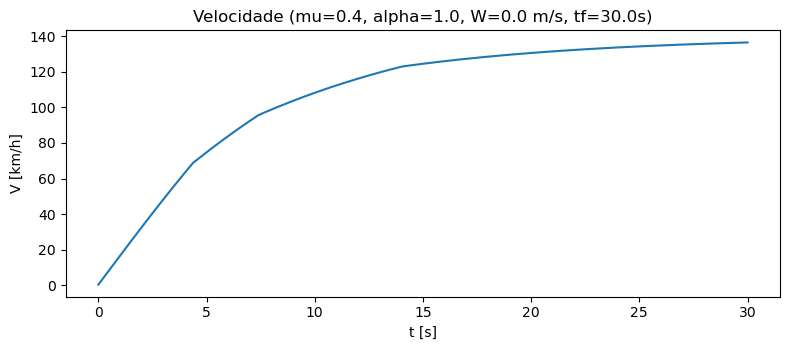

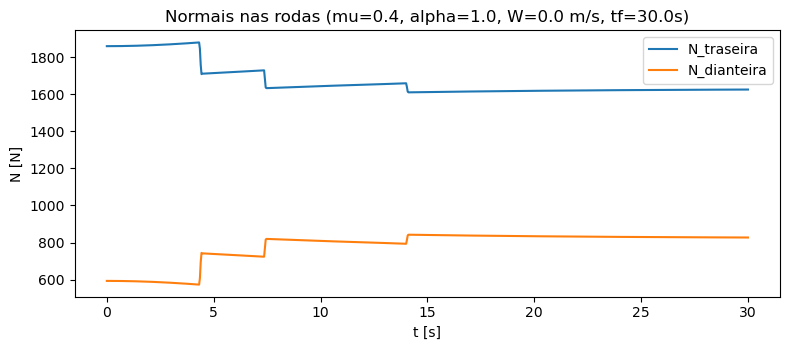

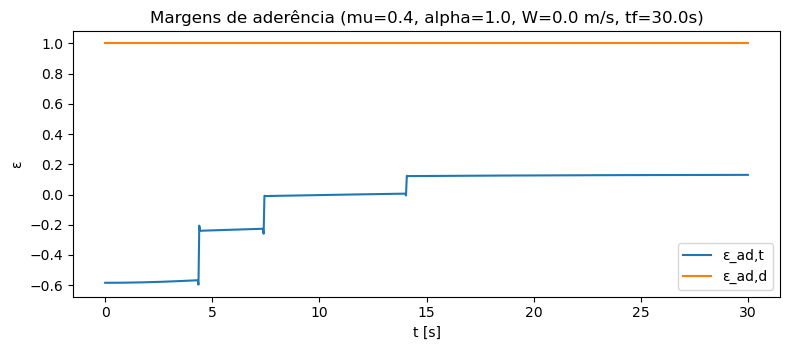

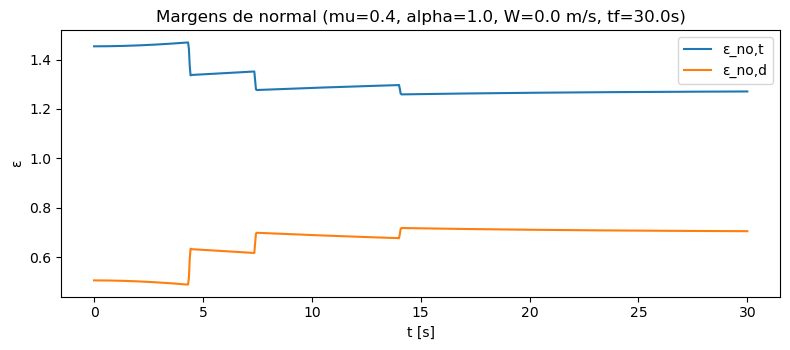

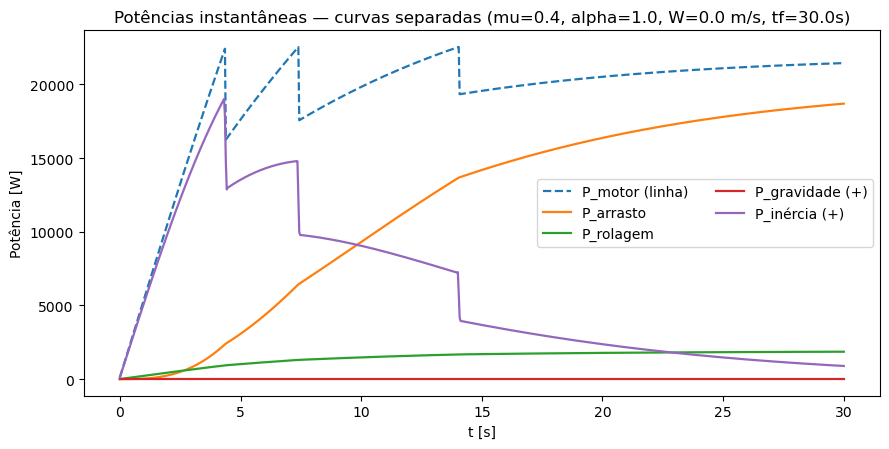

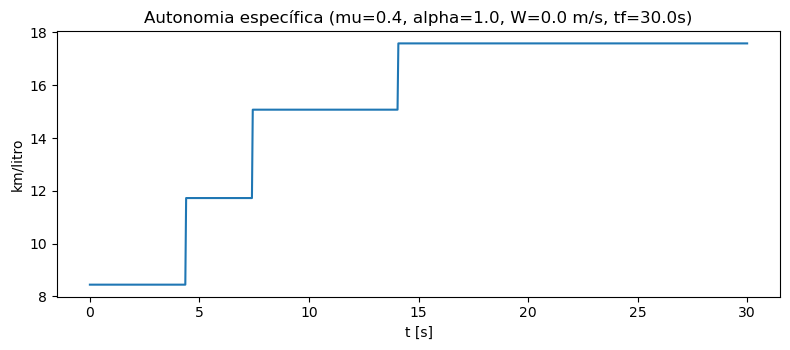

In [33]:
run_case(mu=0.4)

V_final = 37.91 m/s  (136.5 km/h)


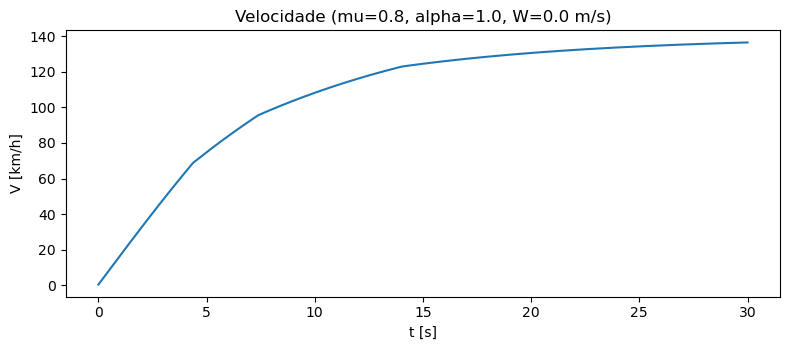

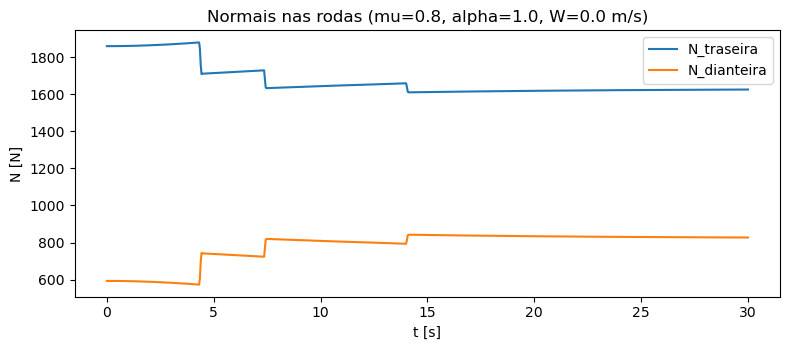

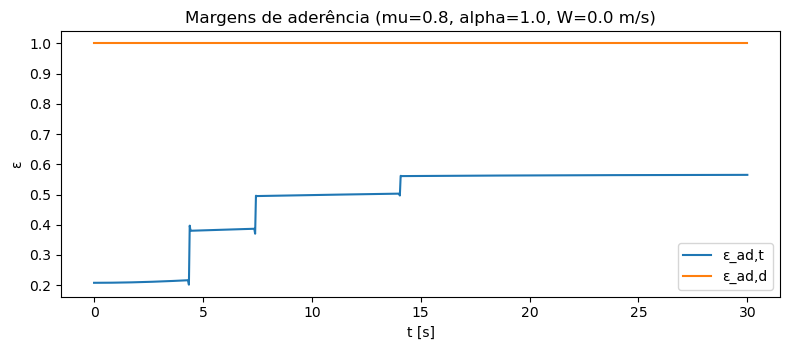

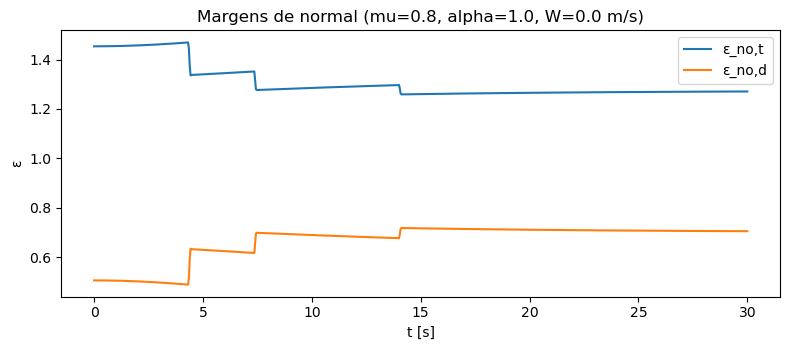

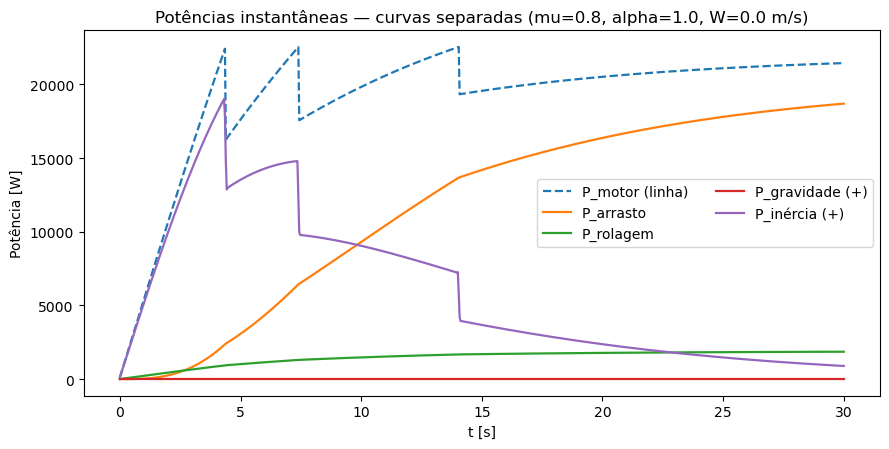

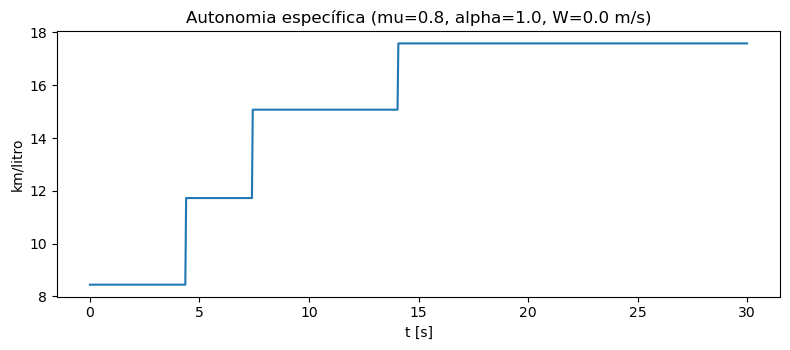

In [13]:
run_case(h_CG=1.2)

V_final = 39.43 m/s  (141.9 km/h)


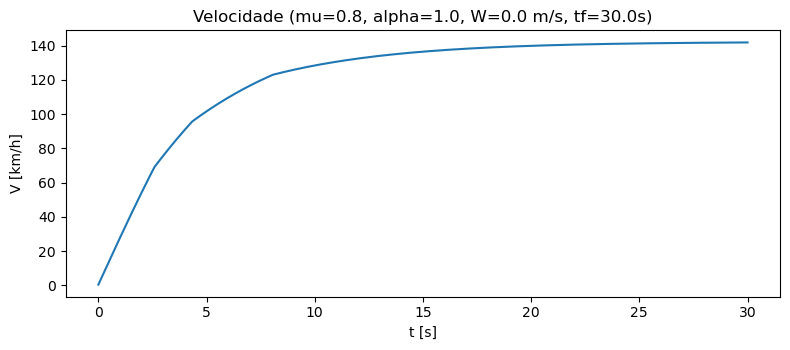

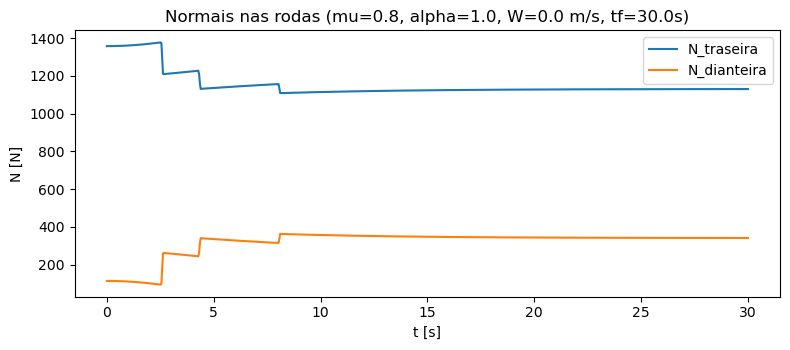

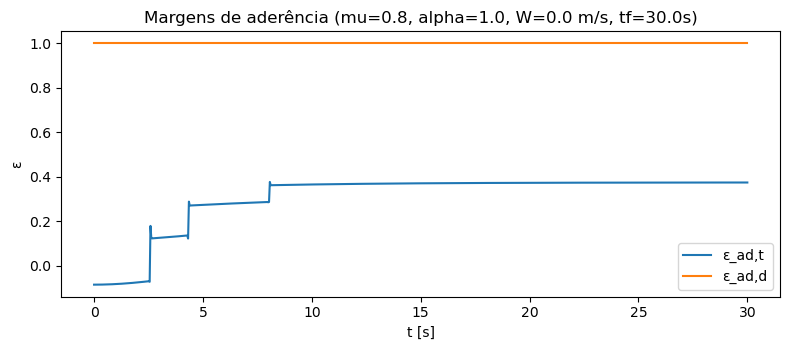

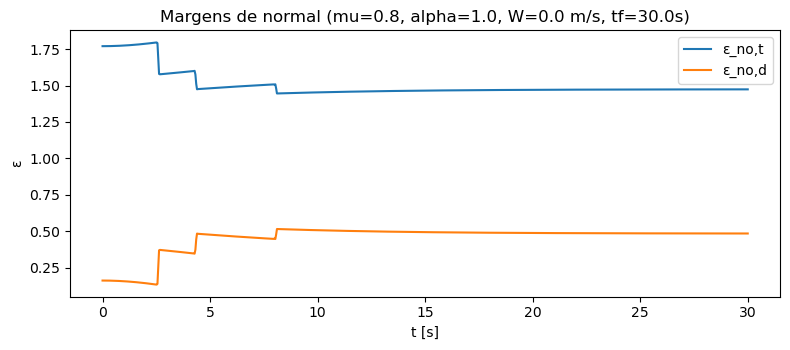

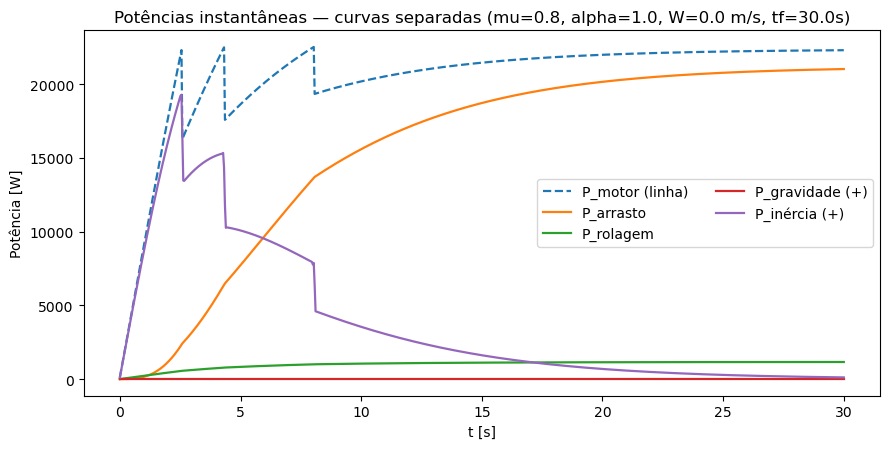

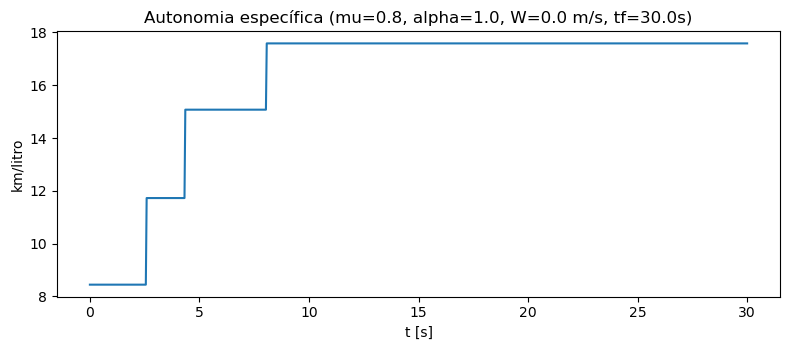

In [34]:
run_case(m=150)

V_final = 43.71 m/s  (157.4 km/h)


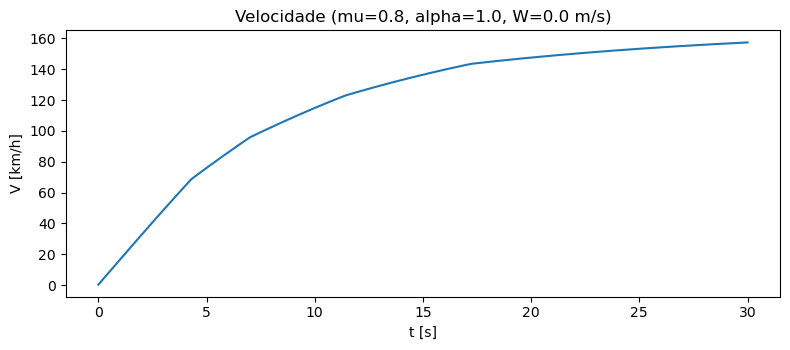

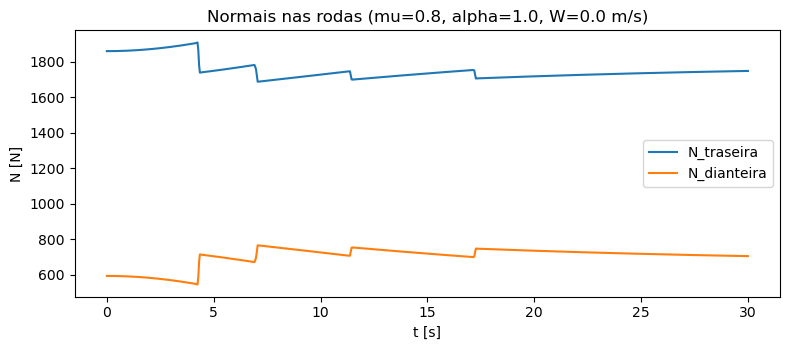

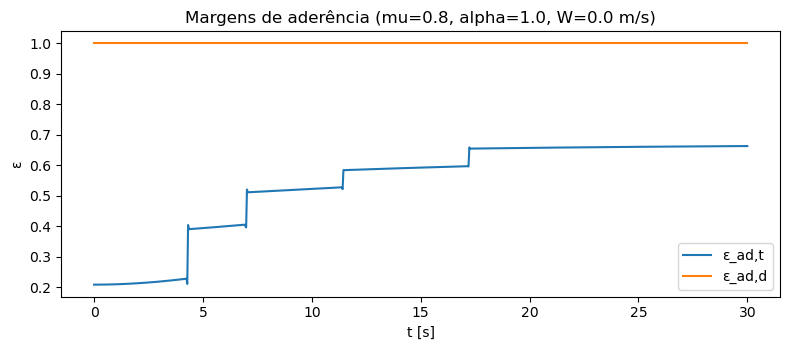

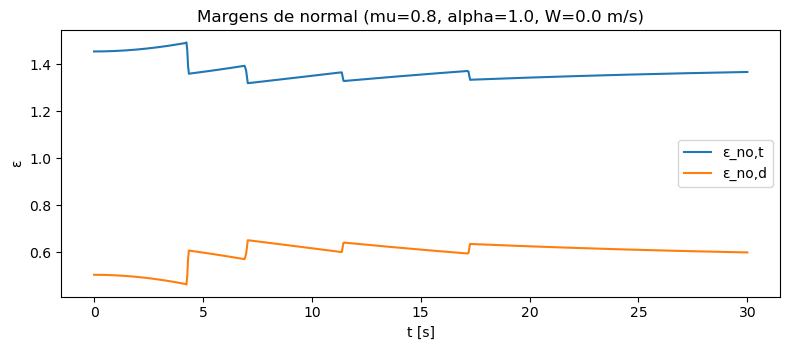

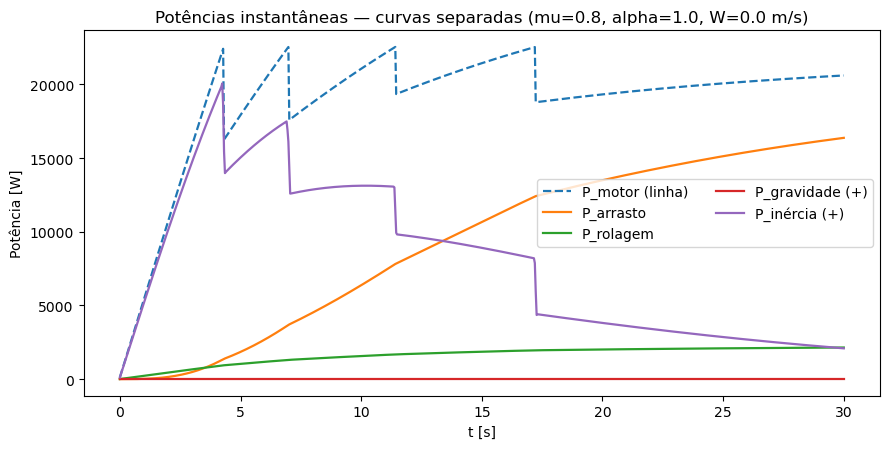

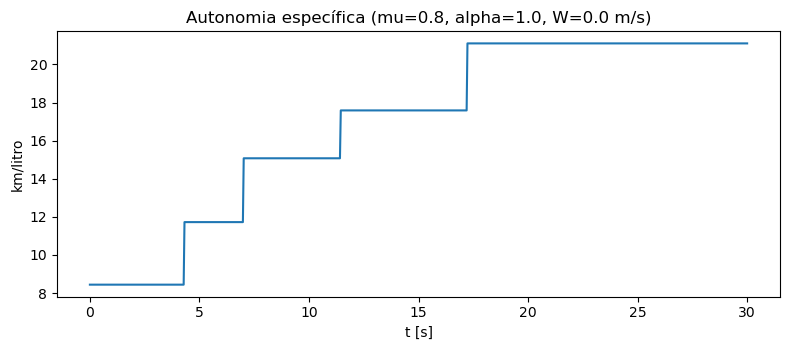

In [15]:
run_case(C_D=0.4)

V_final = 37.91 m/s  (136.5 km/h)


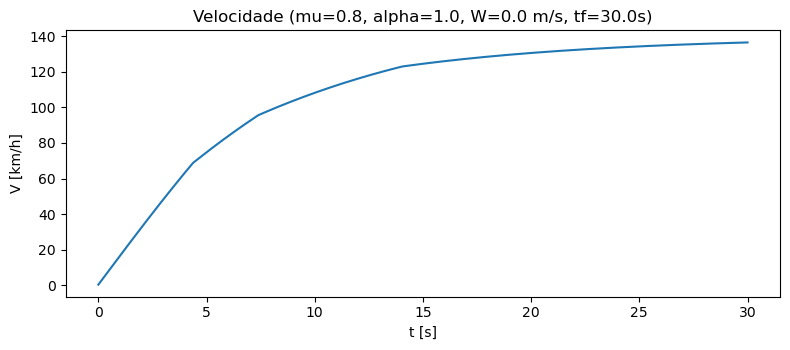

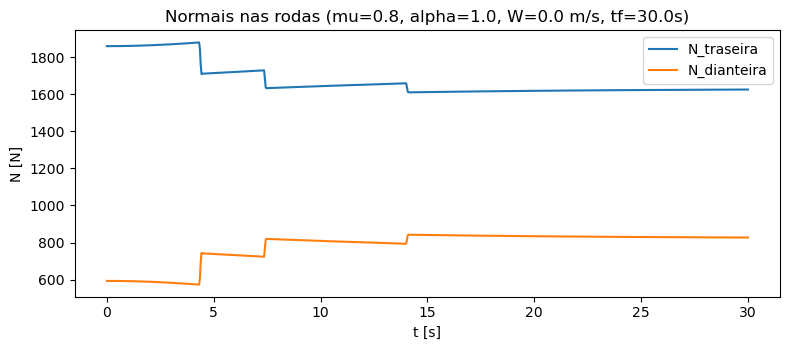

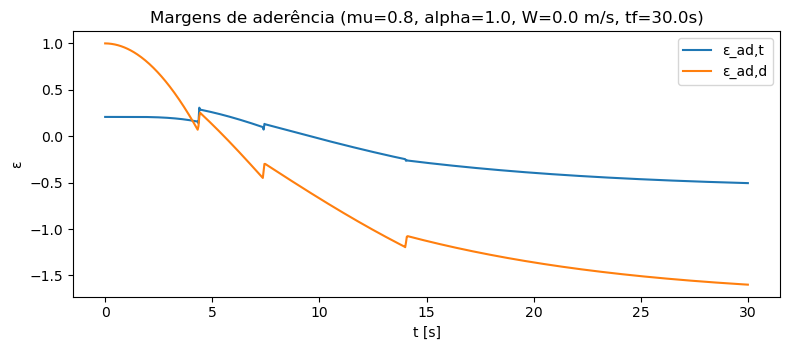

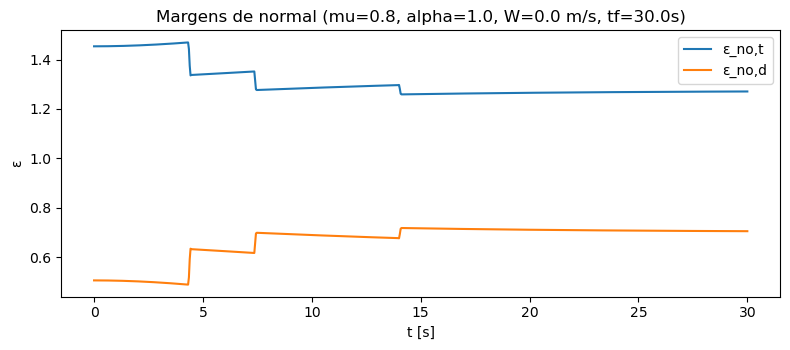

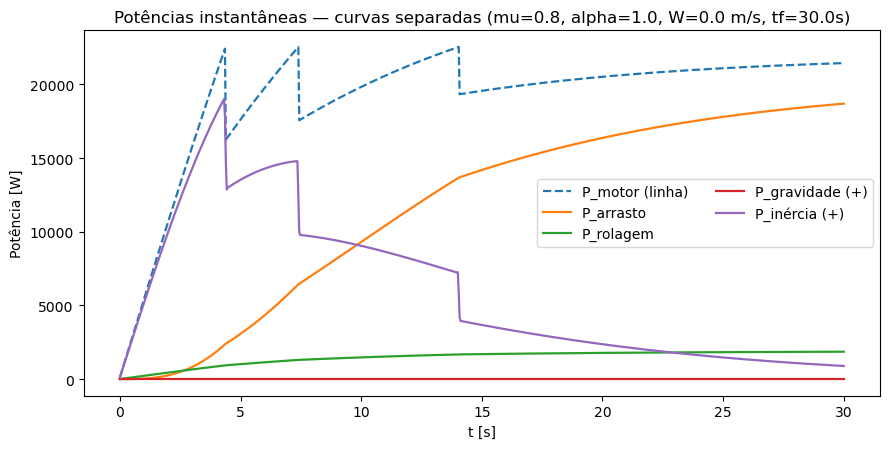

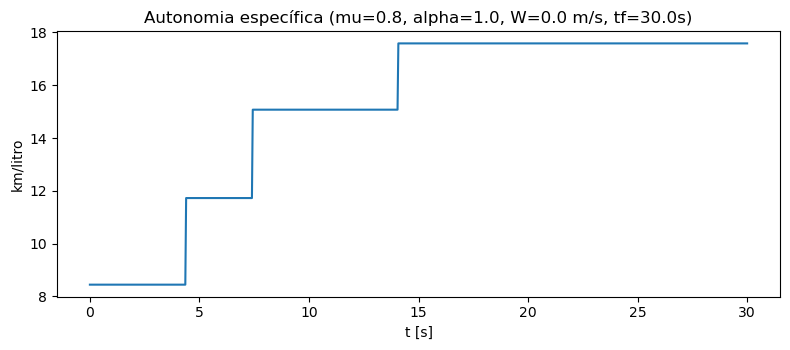

In [35]:
run_case(R_curva=100)  

V_final = -8.25 m/s  (-29.7 km/h)


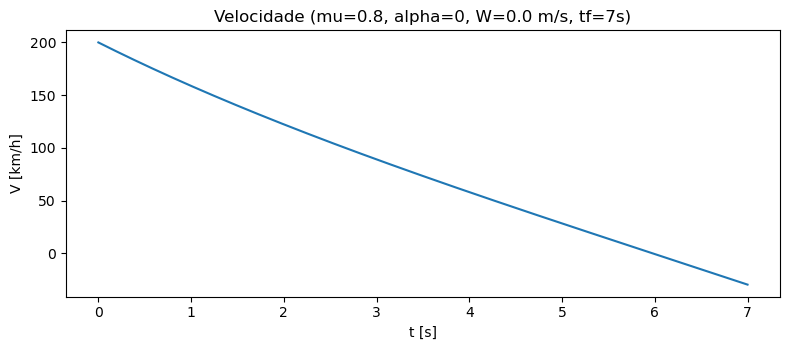

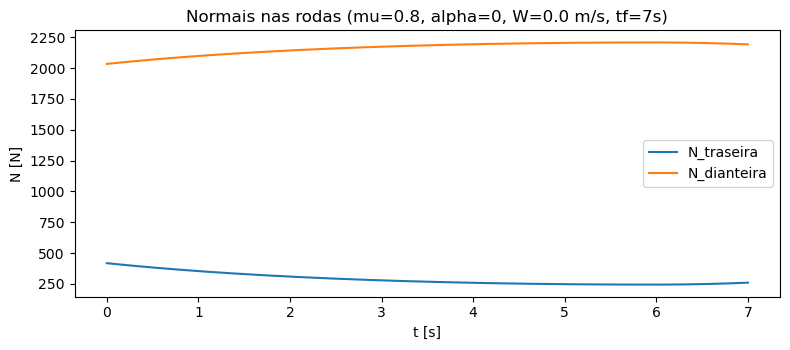

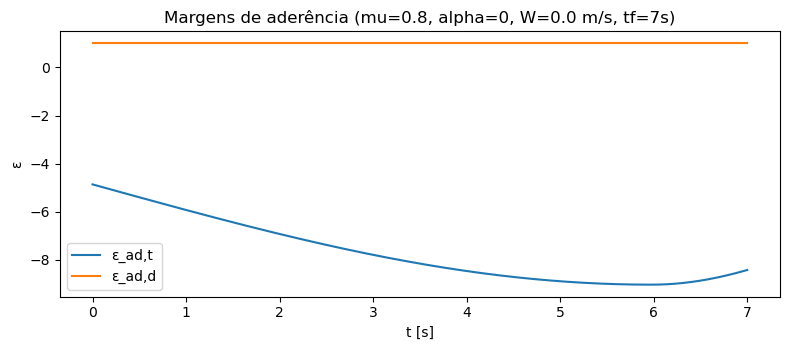

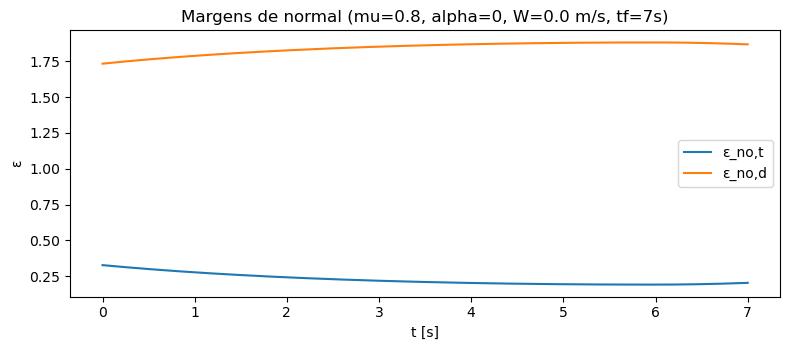

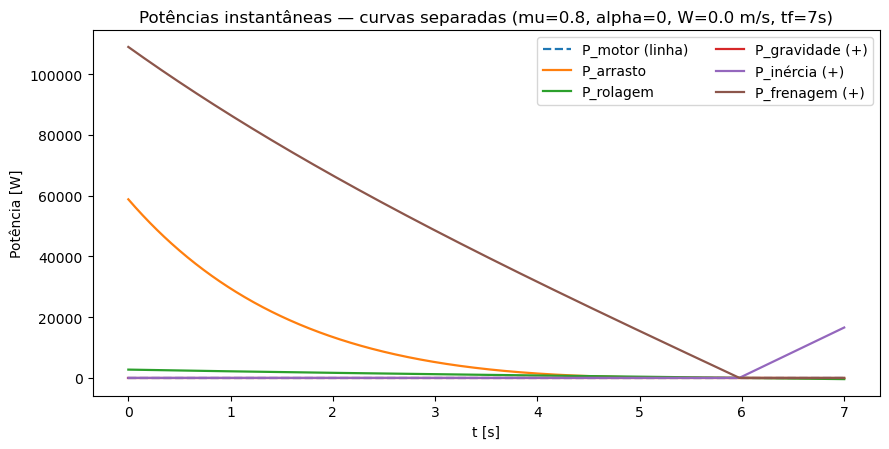

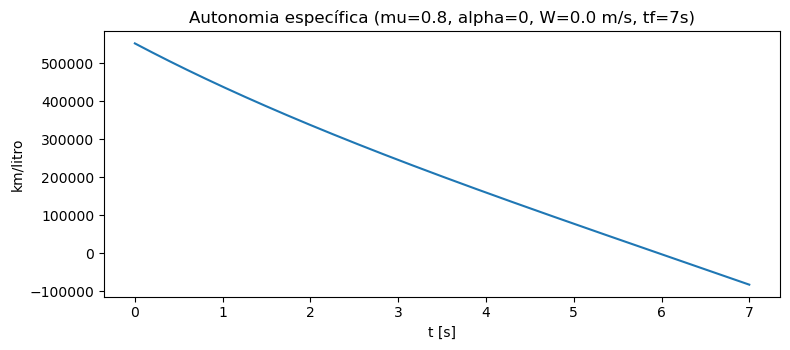

In [36]:
run_case(alpha=0, beta_t=1, beta_d = 1, V0 = 200/3.6, tf=7)  

## Trabalhos futuros

- Variar a eficiência volumétrica e a eficiência da propulsão em função da rotação e da carga.
- Verificar o modelo com os dados/resultados de uma motocicleta real